age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


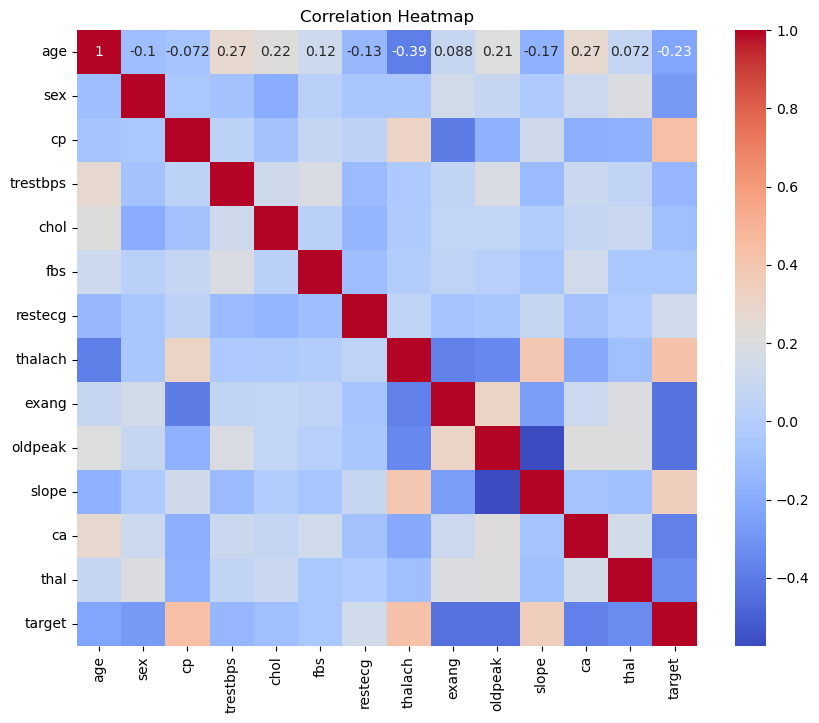

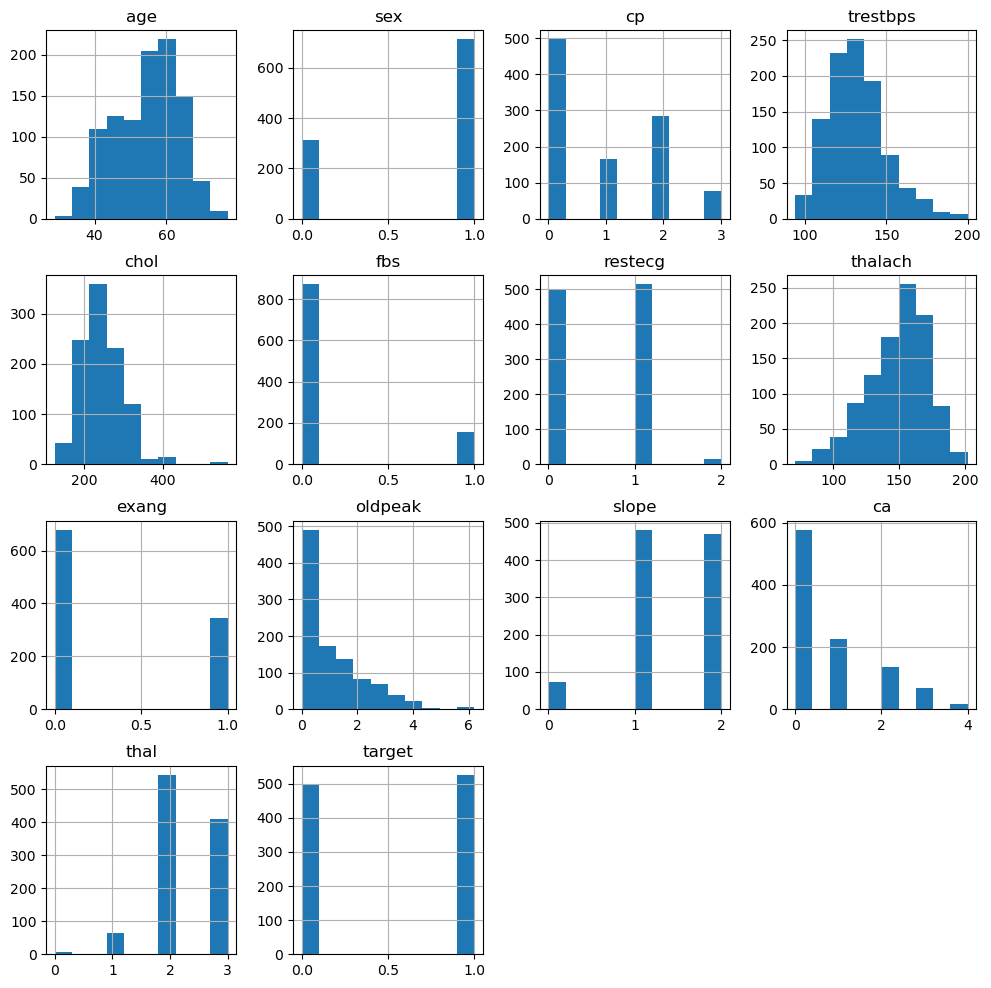

Logistic Regression Accuracy: 0.7951219512195122
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Decision Tree Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\dell\Desktop\heart.csv")  # Replace with your dataset path

# Step 2: Data cleaning and preprocessing
# Checking for missing values
print(data.isnull().sum())

# Dropping rows with missing values (or you can choose other imputation methods)
data = data.dropna()

# Step 3: Exploratory Data Analysis (EDA)
# Visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of all features
data.hist(figsize=(12, 12))
plt.show()

# Step 4: Feature selection/engineering
# Splitting the dataset into features and labels
X = data.drop('target', axis=1)  # 'target' is assumed as the label (heart disease)
y = data['target']

# Step 5: Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Model training - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Step 8: Model training - Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Step 9: Model Evaluation (Logistic Regression)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Step 10: Model Evaluation (Decision Tree)
y_pred_tree = tree_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Step 11: Hyperparameter Tuning (Optional for better performance)
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search.best_params_)